In [22]:
# !pip install chempy
# !pip install periodictable
# !pip install PyAstronomy
# !pip install molmass
#!pip install rdkit

import periodictable as pt
import chempy as ch
import numpy as np
import sympy as sp
import molmass as mm
import pickle
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
pd.set_option('display.max_colwidth', None)
from sympy.plotting import plot 
from IPython.display import Image
from PyAstronomy import pyasl
import decimal
import sympy.physics.units as u
from sympy.physics.units.systems import SI
from rdkit import Chem
from rdkit.Chem import Draw


from sympy.physics.units import speed_of_light, meter, gram, second, day, pound
from sympy.physics.units import mile, newton, kilogram, atomic_mass_constant
from sympy.physics.units import kilometer, centimeter, millimeter, nanometer
from sympy.physics.units import gravitational_constant, hbar, kPa, newton
from sympy.physics.units import convert_to

def RTL(e):
    """INPUT PARAMS: [] of math expressions"""
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$" + sp.latex(e[i]) + "$ &nbsp;&nbsp;")
    
    return(HTML("".join(latex_rendering[0:])))

def BalanceChemEquation(L, R):
    """ INPUT PARAMS: 2 * {} containing react and prod"""
    reac, prod = ch.balance_stoichiometry(L, R)
    Reaction = ch.Reaction(reac, prod)
    return([Reaction, [reac, prod]])
    

class Atom: 
    def __init__(self, pCount, nCount, eCount):
        """INPUT PARAMS: countOfProtons, countOfNeutrons, countOfElectrons"""
        
        an = pyasl.AtomicNo()
        
        self.Protons = pCount
        self.Neutrons = nCount
        self.Electrons = eCount
        self.ElementName = an.getElementName(pCount)
        self.ElementNameWithAtomicMass = an.getElementName(pCount) + "(" + str(self.Protons) + "," + str(self.Protons + self.Neutrons) + ")"
    
    def CreateSummary(self):
        print("Name: ", self.ElementName)
        print("Protons: ", self.Protons)
        print("Neutrons: ", self.Neutrons)
        print("Electrons: ", self.Electrons)

#### Gravimetric Analysis

<b>Note</b>: The technique to determine mass of substance is called <b>Gravimetric Analysis</b>. The approaches, <i>Volatization</i> and <i>Preciptitation</i>

In [10]:
# Problem
# Determine the purity of metal
# Consider the following compound of metal hydrate
# BaCl2 . 2H2O
# this has been mixed with unknown amount of KCl
# 
# Aim to find purity of metal hydrate - do this by heating
# Before heating: BaCL2 . 2H2O (and some KCl) is 9.51g
# After heating:  BaCL2 . 2H2O (and some KCl) is 9.14g

# What is mass % of hydrate in the mixture
# Note the heating process evaporated the the H20 into a gass

# The reaction is: 
# BaCl2 + 2H2O after heating

In [11]:
# This gives a mol ratio 1:2
# Consider the change in mass to figure out how much water has been lost
E1 = 9.51 * u.gram - 9.14 * u.gram
E1

0.369999999999999*gram

In [12]:
# Now see how many woles of water this is
mol = sp.symbols('mol')
E2 = 1 / (mm.Formula("H2O").mass * u.grams / mol)
E3 = E1 * E2
# The amount of moles that have been lost in water
E3

0.0205381129925934*mol

In [13]:
# Note that, due to the balanced reaction, there must be half the amoutn of 
# BaCl2
E4 = E3 / 2
E4


0.0102690564962967*mol

In [19]:
# Convert moles in reactant to mass in grams 

E5 = mm.Formula("BaCl2").mass * u.grams / mol
E6 = 2 * mm.Formula("H2O").mass * u.grams / mol
E7 = E5 + E6
E7

244.263374*gram/mol

In [20]:
# !!

#### Molecular composition

<b>Note</b> molecules can be named in different ways

<b>Note</b> The <i>Empirical Formula</i> (observation based) comes from ratio (e.g.) Benzine is CH

<b>Note</b> The <i>Molecular Formula</i> tells exact number of atoms in molecule: C6H6

<b>Note</b> The <i>Structural Formula</i> tells structure, like a network or even in 3D

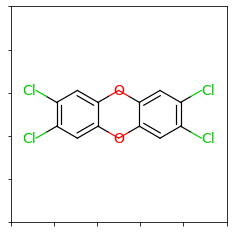

In [25]:
# Note that molecules can be drawn using SMILES language
m = Chem.MolFromSmiles('C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl')
fig = Draw.MolToMPL(m, size=size)

In [27]:
# Problem: Find mass percent of element in a compound
# C6H12O6
# Find total mass
mol = sp.symbols("mol")
E1 = mm.Formula("C6H12O6").mass * u.grams / mol
E1

180.156162*gram/mol

In [32]:
# Find mass of consituents. First C6
E2 = mm.Formula("C6").mass * u.grams / mol
E2

72.06444*gram/mol

In [33]:
# Mass of H12
E3 = mm.Formula("H12").mass * u.grams / mol
E3

12.095292*gram/mol

In [34]:
# Mass of O6
E4 = mm.Formula("O6").mass * u.grams / mol
E4

95.99643*gram/mol

In [35]:
# Note that each mass sums to the whole amount: 
E2 + E3 + E4 == E1

True

In [36]:
# Find mass percent
E5 = E2 / E1 * 100
E6 = E3 / E1 * 100
E7 = E4 / E1 * 100
RTL([E5, E6, E7])